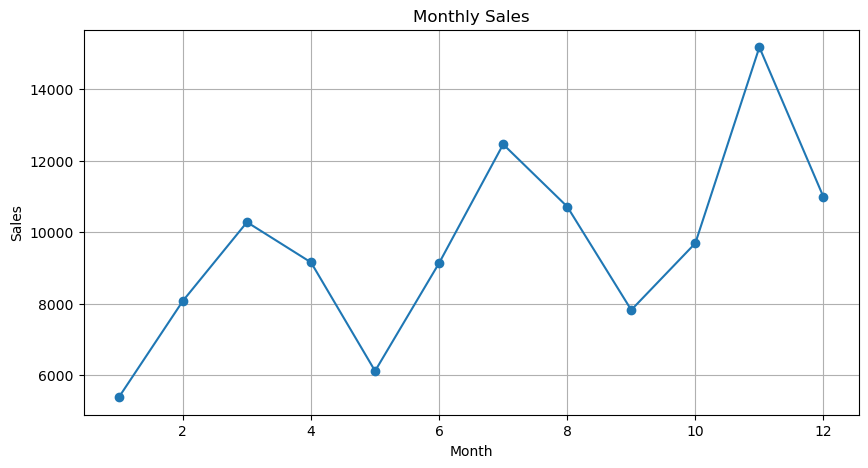

Forecast Results:
    Month  Moving_Average  Exp_Smoothing  Seasonalized
12     13    11953.333333    11649.32666   8218.840075
13     14    11953.333333    11649.32666  11548.229703
14     15    11953.333333    11649.32666  16113.961255
15     16    11953.333333    11649.32666  13241.635634

Evaluation (Backtest on months 9–12):
MAE - Moving Avg: 2162.25
MAE - Exp Smoothing: 2162.25


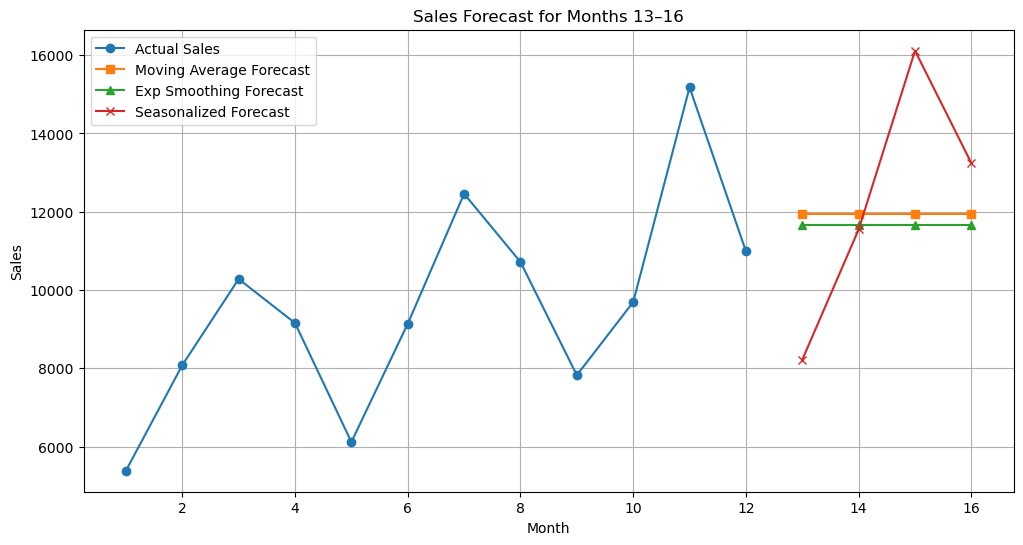

In [3]:
# I. Basic Time-Series Analyses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Prepare  data
sales_data = {
    'Month': list(range(1, 13)),
    'Sales': [5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]
}
df = pd.DataFrame(sales_data)

# 1. Visualize the time-series
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# 2. Predict months 13–16 without seasonality
# a) Moving Average (window = 3)
df['MA_3'] = df['Sales'].rolling(window=3).mean()
ma_forecast = df['Sales'].rolling(window=3).mean().iloc[-1]
ma_predictions = [ma_forecast] * 4

# b) Smoothing
model = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=0.5, optimized=False)
ses_predictions = model.forecast(4)

# 3. With seasonality, Divide into 3 cycles
cycles = {
    'Cycle1': df['Sales'][0:4].values,
    'Cycle2': df['Sales'][4:8].values,
    'Cycle3': df['Sales'][8:12].values
}
cycle_avg = [np.mean(c) for c in cycles.values()]

# Compute seasonal indices
seasonal_indices = []
for i in range(4):
    index = np.mean([cycles['Cycle1'][i]/cycle_avg[0], cycles['Cycle2'][i]/cycle_avg[1], cycles['Cycle3'][i]/cycle_avg[2]])
    seasonal_indices.append(index)

# Linear regression to predict next cycle average
X = np.array([[1], [2], [3]])
y = np.array(cycle_avg)
reg = LinearRegression().fit(X, y)
next_cycle_avg = reg.predict([[4]])[0]

# Seasonalized forecasts for months 13–16
seasonalized_forecasts = [next_cycle_avg * si for si in seasonal_indices]

# 4. Evaluation
# Combine forecasts into DataFrame
results = pd.DataFrame({
    'Month': list(range(13, 17)),
    'Moving_Average': ma_predictions,
    'Exp_Smoothing': ses_predictions,
    'Seasonalized': seasonalized_forecasts
})

print("Forecast Results:")
print(results)

# Evaluate on historical: Backtest on months 9–12
test_actual = df['Sales'][8:12].values

# Forecast backtest for MA and SES (using only up to month 8)
ma_base = df['Sales'].rolling(window=3).mean().iloc[7]
ma_backtest = [ma_base] * 4
ses_model_bt = SimpleExpSmoothing(df['Sales'][:8]).fit(smoothing_level=0.5, optimized=False)
ses_backtest = ses_model_bt.forecast(4)

# Errors
print("\nEvaluation (Backtest on months 9–12):")
print("MAE - Moving Avg:", mean_absolute_error(test_actual, ma_backtest))
print("MAE - Exp Smoothing:", mean_absolute_error(test_actual, ses_backtest))

# Plot all forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Sales'], marker='o', label='Actual Sales')
plt.plot([13,14,15,16], ma_predictions, marker='s', label='Moving Average Forecast')
plt.plot([13,14,15,16], ses_predictions, marker='^', label='Exp Smoothing Forecast')
plt.plot([13,14,15,16], seasonalized_forecasts, marker='x', label='Seasonalized Forecast')
plt.legend()
plt.title("Sales Forecast for Months 13–16")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


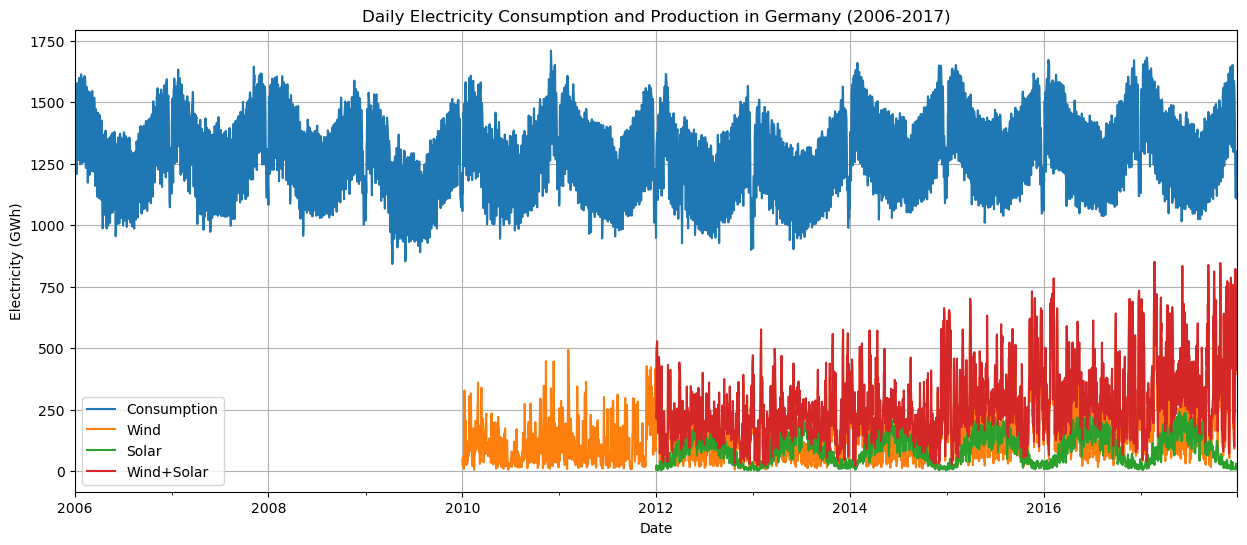

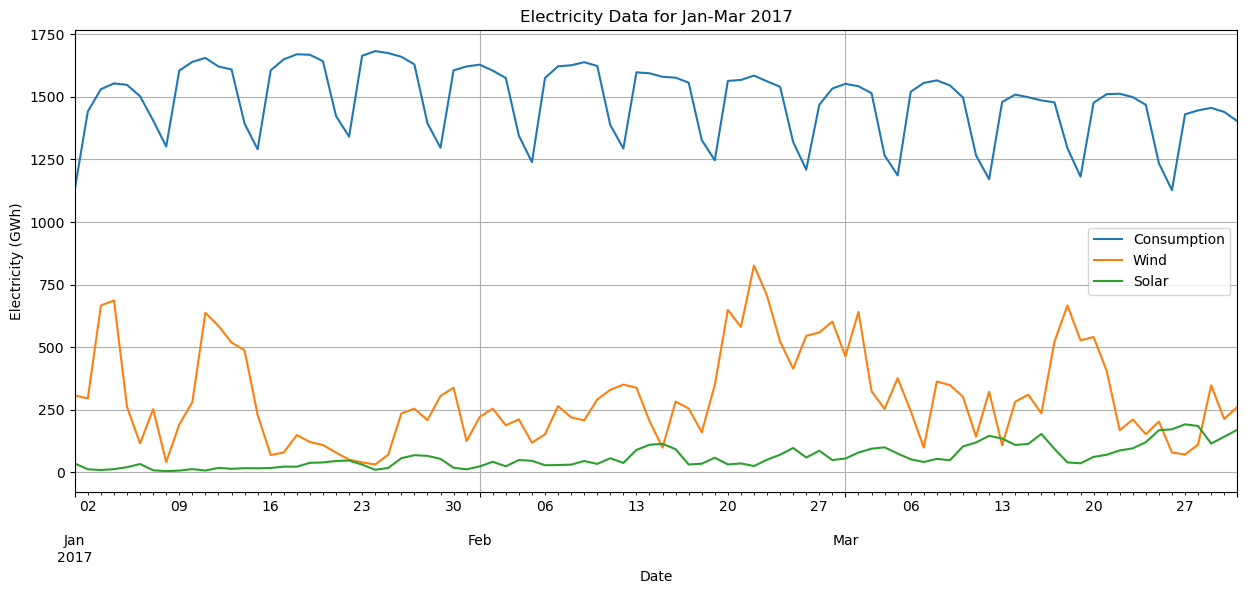

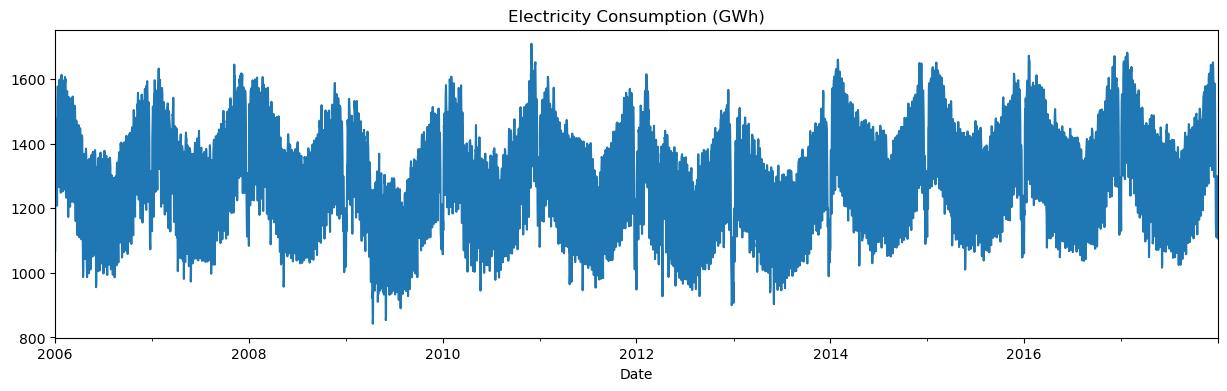

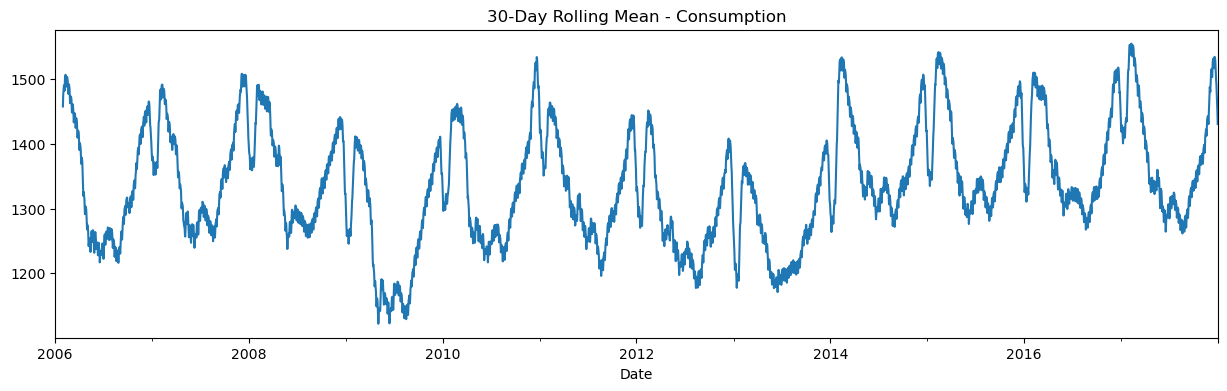

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64
Consumption       0
Wind           1461
Solar          2191
Wind+Solar     2191
dtype: int64
             Consumption      Wind     Solar  Wind+Solar
Consumption     1.000000  0.137250 -0.278118    0.029661
Wind            0.137250  1.000000 -0.308697    0.924630
Solar          -0.278118 -0.308697  1.000000    0.076554
Wind+Solar      0.029661  0.924630  0.076554    1.000000


C:\Users\Sarah\AppData\Local\Temp\ipykernel_1200\3517654346.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')  # or use df.interpolate()


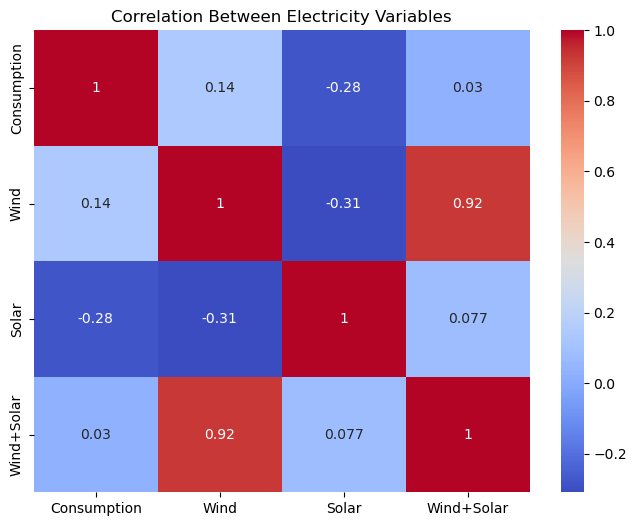

In [9]:
# II. Time-Series Analyses for Electricity Consumption
# 1. Electricity Consumption Exploration
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'], index_col='Date')

# Basic plot of time series
df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].plot(figsize=(15, 6))
plt.title("Daily Electricity Consumption and Production in Germany (2006-2017)")
plt.xlabel("Date")
plt.ylabel("Electricity (GWh)")
plt.grid(True)
plt.show()

# Change scale
df['2017-01':'2017-03'][['Consumption', 'Wind', 'Solar']].plot(figsize=(15, 6))
plt.title("Electricity Data for Jan-Mar 2017")
plt.ylabel("Electricity (GWh)")
plt.grid(True)
plt.show()

# Further exploration
df['Consumption'].plot(figsize=(15, 4), title="Electricity Consumption (GWh)")
plt.show()
df['Consumption'].rolling(window=30).mean().plot(figsize=(15, 4), title="30-Day Rolling Mean - Consumption")
plt.show()

# Check missing values
print(df.isnull().sum())

# Fill missing values
df_filled = df.fillna(method='ffill')  # or use df.interpolate()

# See if there are any more missing values
print(df_filled.isnull().sum())

# Correlation matrix
correlation = df_filled[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].corr()
print(correlation)

# Visualize correlation with a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Electricity Variables")
plt.show()


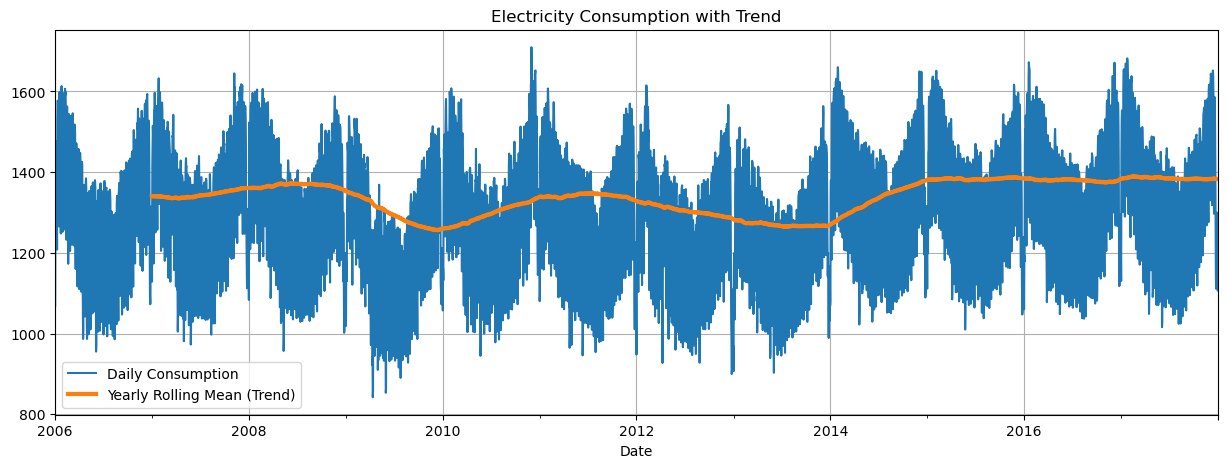

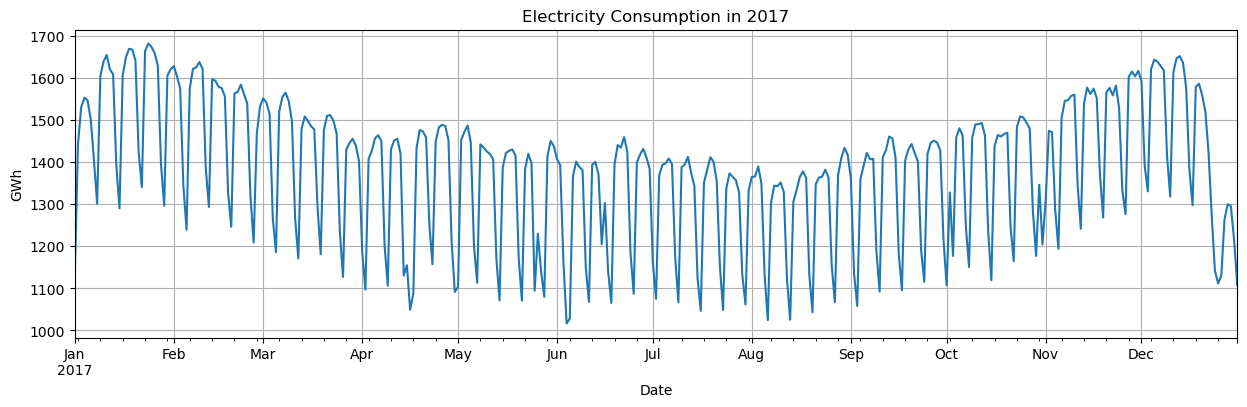

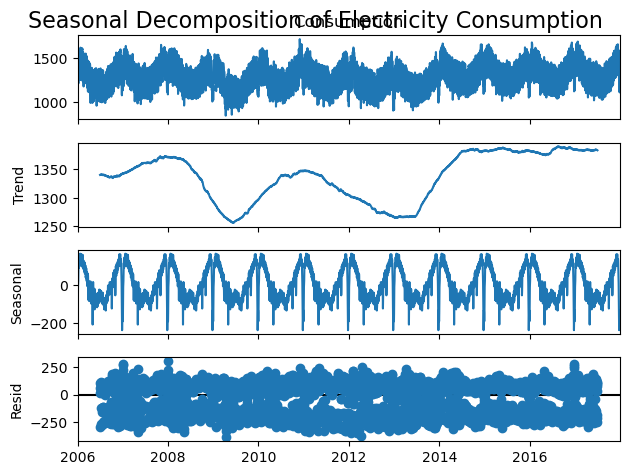

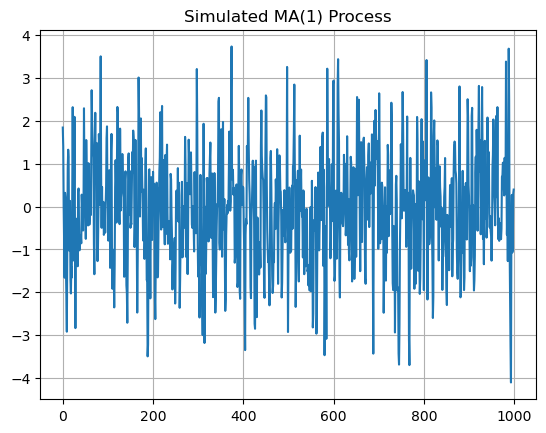

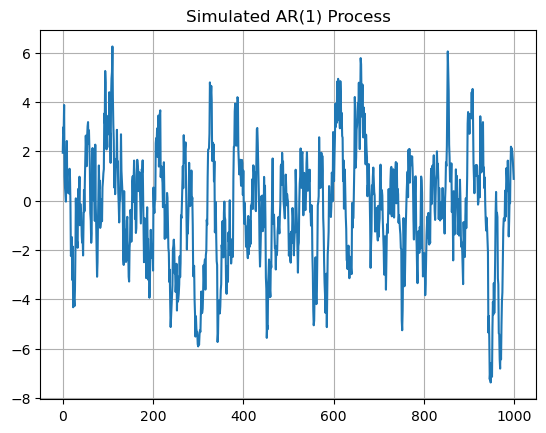

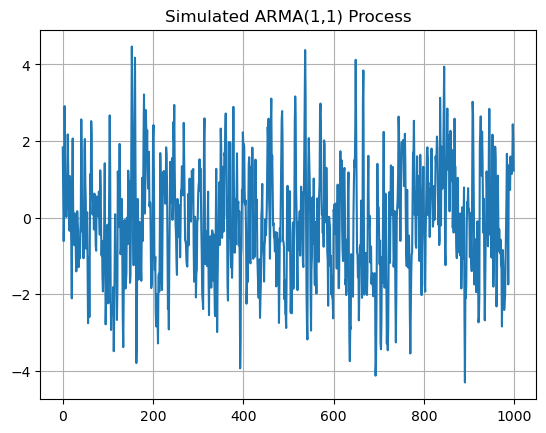

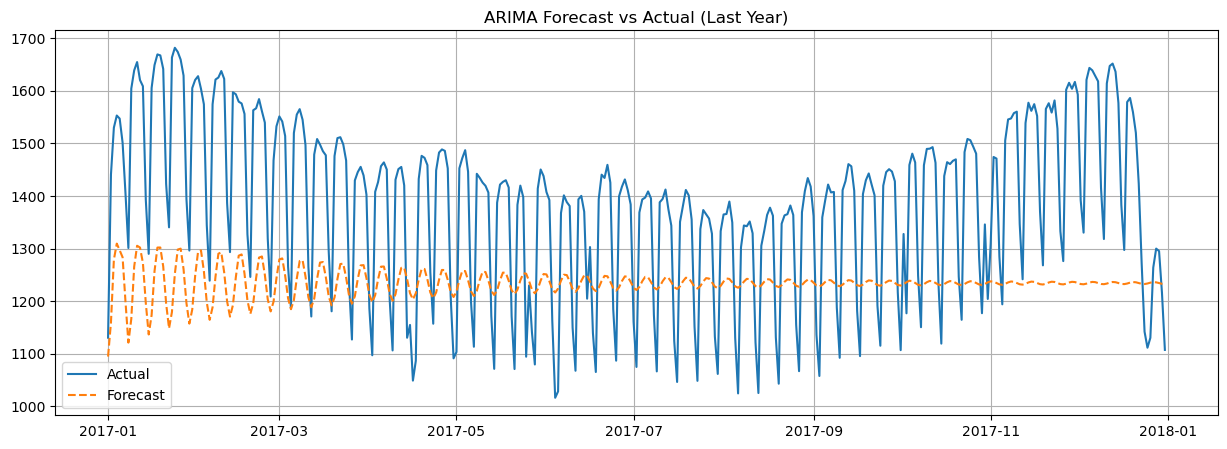

Mean Squared Error (MSE): 46228.083765800366
Root Mean Squared Error (RMSE): 215.0071714287697


In [15]:
# 2. Electricity Consumption Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'], index_col='Date')

# Use only 'Consumption' column and fill missing values
df = df[['Consumption']].fillna(method='ffill')

# 1. Plot Trend (with Rolling Mean)
plt.figure(figsize=(15, 5))
df['Consumption'].plot(label='Daily Consumption')
df['Consumption'].rolling(window=365).mean().plot(label='Yearly Rolling Mean (Trend)', linewidth=3)
plt.title("Electricity Consumption with Trend")
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Seasonality
df.loc['2017', 'Consumption'].plot(figsize=(15, 4), title='Electricity Consumption in 2017')
plt.ylabel("GWh")
plt.grid(True)
plt.show()

# 3. Automatic Decomposition
result = seasonal_decompose(df['Consumption'], model='additive', period=365)
result.plot()
plt.suptitle('Seasonal Decomposition of Electricity Consumption', fontsize=16)
plt.show()


# 4. Moving Average (MA) Process
ma_process = ArmaProcess(ma=[1, 0.8])
ma_sample = ma_process.generate_sample(nsample=1000)
plt.plot(ma_sample)
plt.title("Simulated MA(1) Process")
plt.grid(True)
plt.show()

# 5. Autoregressive (AR) Process
ar_process = ArmaProcess(ar=[1, -0.9])
ar_sample = ar_process.generate_sample(nsample=1000)
plt.plot(ar_sample)
plt.title("Simulated AR(1) Process")
plt.grid(True)
plt.show()

# 6. Simulate ARMA Process
arma_process = ArmaProcess(ar=[1, -0.5], ma=[1, 0.4])
arma_sample = arma_process.generate_sample(nsample=1000)
plt.plot(arma_sample)
plt.title("Simulated ARMA(1,1) Process")
plt.grid(True)
plt.show()


# 7. ARIMA Forecasting
# Train-test split: use last 365 days as test set
train = df['Consumption'][:-365]
test = df['Consumption'][-365:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()
# Forecast for next year
forecast = model_fit.forecast(steps=365)
# Plot forecast vs actual
plt.figure(figsize=(15, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title("ARIMA Forecast vs Actual (Last Year)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
